In [1]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

try:
    os.chdir("./Resources")
except:
    pass

/Library/Python/2.7/site-packages/librosa/core/audio.py:33: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [11]:
y, sr = librosa.load('./single-snare-4.wav')
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

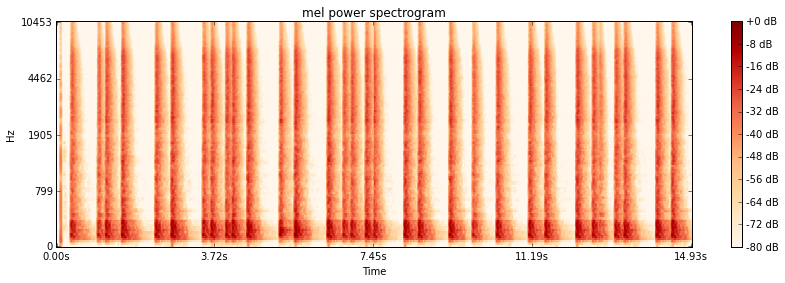

In [12]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [13]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 645.0, 0.0, 33.650625067269765)

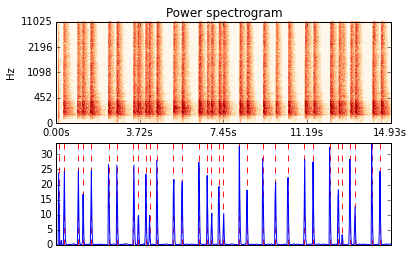

In [14]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [15]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[  3.93800020e-01   4.15763289e-01   3.66529554e-01 ...,   3.27720046e-02
   2.65342593e-02   3.24494817e-04]
[  2.04545104e-05   6.00583917e-05   7.72172061e-05 ...,   4.66273800e-02
   2.15517916e-02   3.03639157e-04]
[  1.84552337e-04   2.50967307e-04   2.66404328e-04 ...,   6.26048446e-02
   3.50466758e-01   6.57087326e-01]
[  6.28472771e-05   4.11384935e-05   8.18808621e-06 ...,   3.11277568e-01
   6.02720201e-01   7.12890446e-01]
[  2.08079873e-04   2.66165298e-04   2.51612306e-04 ...,   4.24924105e-01
   9.27251056e-02   1.61614958e-02]
[ 0.00047547  0.0008401   0.00123453 ...,  0.29409903  0.46584758
  0.13730755]
[  2.50452727e-01   6.42687738e-01   1.69183338e+00 ...,   5.85001230e-01
   6.22142106e-02   6.99057942e-04]
[ 0.00385094  0.00316416  0.0036236  ...,  1.24803996  0.51143408
  0.10813748]
[ 0.07522807  0.07033896  0.06142876 ...,  0.04370176  0.04786856
  0.00205466]
[  2.92163488e-04   3.46084242e-04   9.69081942e-04 ...,   8.98186982e-01
   1.68102562e+00   1.7945

In [16]:
filename = raw_input()
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

snareFrames4.csv
